We tested the following graph in gtrieScanner to prove that contained motifs are not part of the detection:

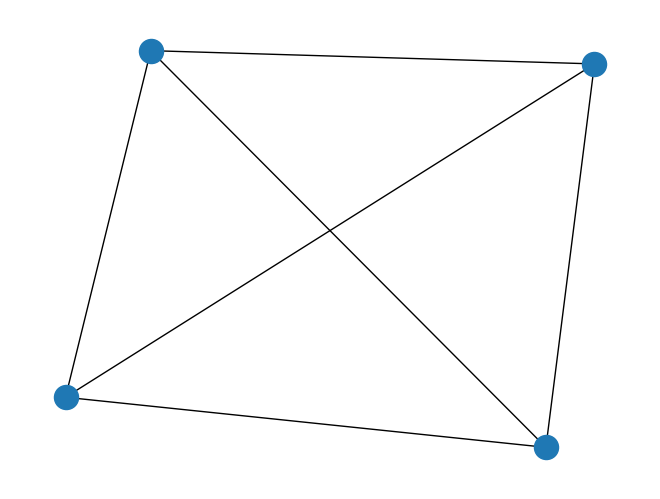

In [29]:
import networkx as nx

g = nx.read_edgelist("/home/timgarrels/masterthesis/datasets/square_2_cross_no_comment")
nx.draw(g)

It obviously a double-crossed square motif. However it obviously also contains the single-crossed square. However, that motif does not get detected:
```
Motif Analysis Results

Graph   Org_Freq |  Z-score |    Rnd_Avg +/-    Rnd_Dev

0111
1011
1101
1110           1 |     0.00 |       0.00 +/-       0.00
```

We therefore test on a larger graph. This graph contains every single 4-Graphlet, all rooted at the center node "1".

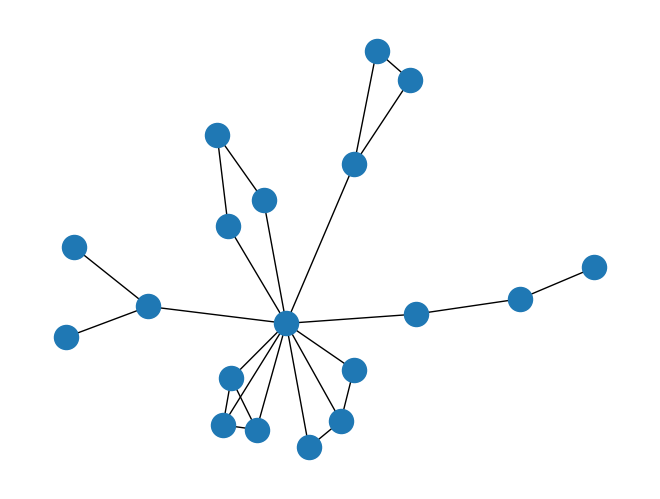

In [85]:
import networkx as nx

g = nx.read_edgelist("/home/timgarrels/masterthesis/datasets/all_4_graphlets")
pos = nx.spring_layout(g, k=0.35)
nx.draw(g, pos=pos)

However, the detection does not find all 4-Graphlets exactly once:
```
Motif Analysis Results

Graph   Org_Freq |  Z-score |    Rnd_Avg +/-    Rnd_Dev

0111
1000
1000
1000         124 |     0.00 |       0.00 +/-       0.00

0110
1001
1000
0100          69 |     0.00 |       0.00 +/-       0.00

0111
1010
1100
1000          41 |     0.00 |       0.00 +/-       0.00

0110
1001
1001
0110           1 |     0.00 |       0.00 +/-       0.00

0111
1011
1100
1100           1 |     0.00 |       0.00 +/-       0.00

0111
1011
1101
1110           1 |     0.00 |       0.00 +/-       0.00

```

In [87]:
124 + 69 + 41 + 1 + 1 + 1

237

It finds `124 + 69 + 41 + 1 + 1 + 1 = 237` motifs. Why?

There are `3876` unique node sets with the size 4 in the graph:

In [20]:
from itertools import combinations

unique_node_sets = list(combinations([str(n) for n in range(1,20,1)], 4))
len(unique_node_sets)

3876

However, not all of those nodesets induce a connected subgraph:

In [28]:
is_connected_subgraph = lambda ns: nx.is_connected(nx.subgraph(g, ns))

connected_unique_node_sets = [ns for ns in unique_node_sets if is_connected_subgraph(ns)]
len(connected_unique_node_sets)

237

Each unique nodeset, which is an connected induced subgraph is turned into a motif!